# Picture Generator

The point is to create a small picture that has known values,and it has a known form, known histogramm and a known result.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as randn

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm as cm

GRAY = cm.get_cmap('gray', 256)

import sys
import os

In [14]:
def someWeirdThing(XXX,x0,x1,center,width,size):
    #x : value
    #center: location of the curve
    #width: width of the curve
    #height: mnimum value added later
    XXX[x0,x1]= size * np.exp(-(x0-center)**2 / (2*width) ) * np.exp(-(x1-center)**2 / (2*width) ) 
    
def castRect(XXX,x0,x1,y0,y1,value):
    XXX[x0:x1,y0:y1] = value
    
def randRect(XXX,x0,x1,y0,y1,value):
    for i in range(0,x1-x0):
        for j in range(0,y1-y0):
            if(randn.uniform(0,1) > 0.5):
                XXX[x0+i,y0+j] = value
                
def castRectHole(XXX,x0,x1,y0,y1,value):
    castRect(XXX,x0,x0+2,y0,y1,value)
    castRect(XXX,x1-2,x1,y0,y1,value)
    castRect(XXX,x0,x1,y0,y0+2,value)
    castRect(XXX,x0,x1,y1-2,y1,value)

In [15]:
s0,s1=30,30
example_pic = np.ones((s0,s1))*128
ex_pic1 = np.zeros((s0,s1))
for i in range(0,s0):
    for j in range(0,s1):
        someWeirdThing(ex_pic1,i,j,30,200,70)
ex_pic1 = ex_pic1 + example_pic
castRect(ex_pic1,3,5,2,14,160)
castRect(ex_pic1,11,13,2,14,160)
castRect(ex_pic1,4,12,7,9,160)
randRect(ex_pic1,17,28,17,28,140)
castRectHole(ex_pic1,2,14,17,28,190)
castRectHole(ex_pic1,17,28,2,14,120)
ax_x = [str(n) for n in range(0,s0)]
ax_y = [str(n) for n in range(0,s1)]
for i in range(0,s0):
    for j in range(0,s1):
        ex_pic1[i,j]=int(round(ex_pic1[i,j],0))
np.savetxt("test_pic.txt", ex_pic1,fmt="%d",header="20 20",delimiter=" ",comments="")
ex_pic1 = np.genfromtxt("test_pic.txt",dtype=int, skip_header=True,)

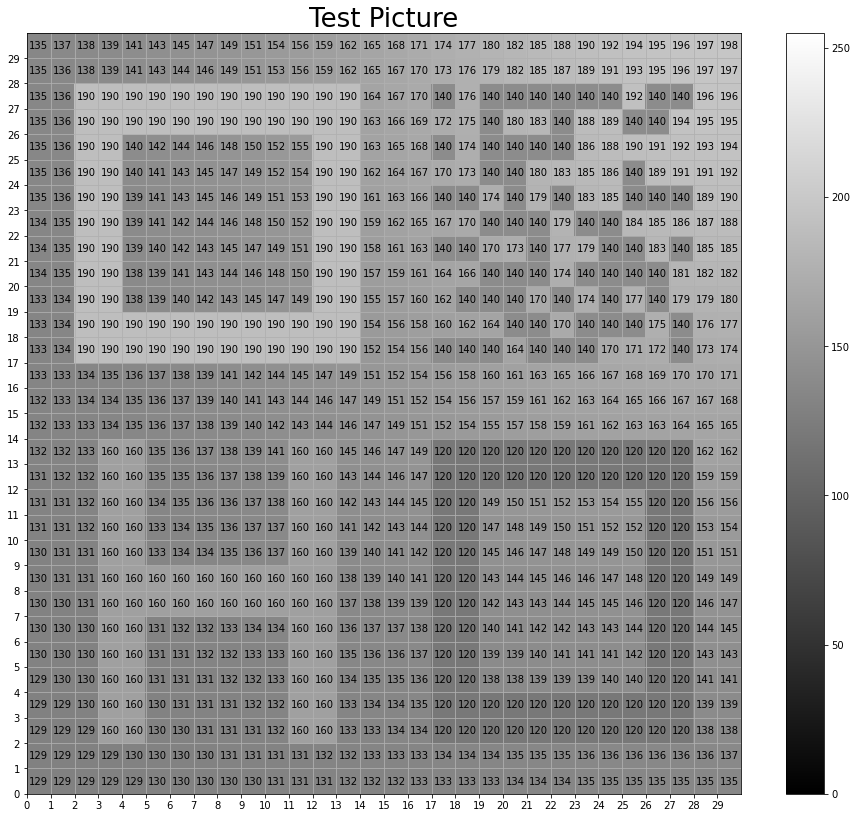

In [16]:
example_pic = ex_pic1
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Test Picture", fontsize=26)
ax.set_xticks(np.arange(s0))
ax.set_yticks(np.arange(s1))
ax.set_xticklabels(ax_x)
ax.set_yticklabels(ax_y)
for i in range(len(example_pic)):
    for j in range(len(example_pic[0,:])):
        color0 ="black"
        if(int(round(example_pic.T[i, j],0))<=110):
            color0="white"
        text = ax.text(j+0.5, i+0.5, str(example_pic.T[i, j]),
                       ha="center", va="center", color=color0)
fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/test_pic.jpeg", format="jpeg", dpi=200)
plt.show()


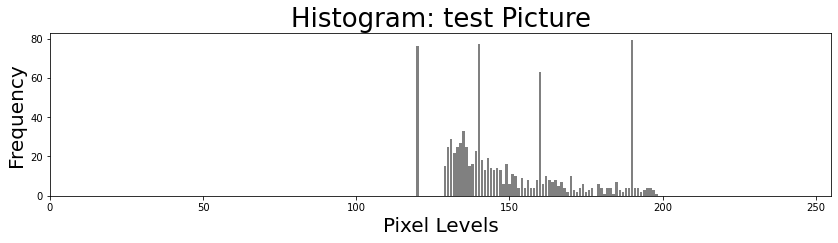

In [17]:
values,counts = np.unique(ex_pic1,return_counts=True)
plt.figure(figsize=(14,3))
plt.title("Histogram: test Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
fig.tight_layout()
plt.savefig("pics_preview/test_pic_hist.jpeg", format="jpeg", dpi=200,bbox_inches="tight")
plt.show()

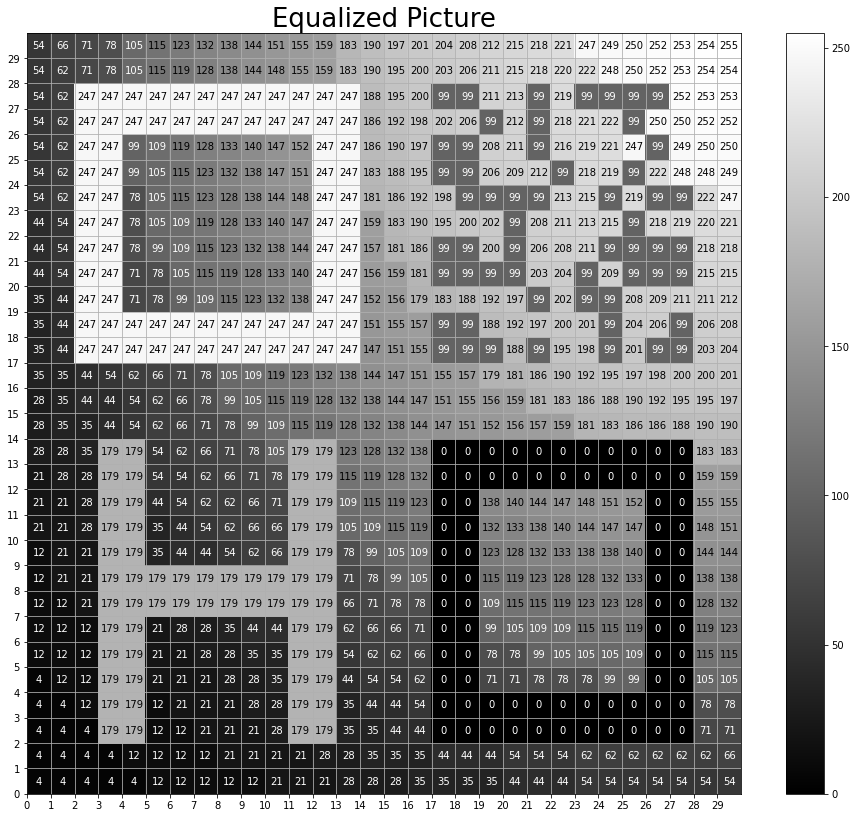

In [18]:
eq_pic1 = np.genfromtxt("../basic/output/test_pic.txt",dtype=int, skip_header=True,)

example_pic = eq_pic1
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Equalized Picture", fontsize=26)
ax.set_xticks(np.arange(s0))
ax.set_yticks(np.arange(s1))
ax.set_xticklabels(ax_x)
ax.set_yticklabels(ax_y)
for i in range(len(example_pic)):
    for j in range(len(example_pic[0,:])):
        color0 ="black"
        if(int(round(example_pic.T[i, j],0))<=110):
            color0="white"
        text = ax.text(j+0.5, i+0.5, str(example_pic.T[i, j]),
                       ha="center", va="center", color=color0)
fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/eq_pic.jpeg", format="jpeg", dpi=200)
plt.show()


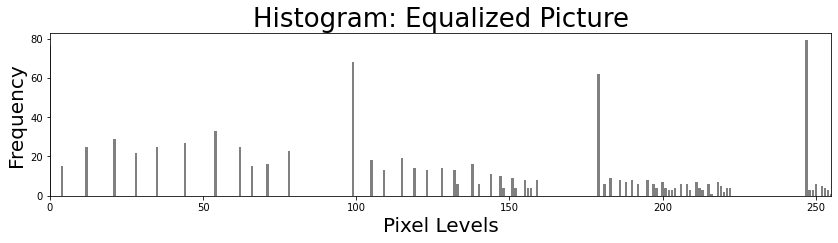

In [19]:
values,counts = np.unique(eq_pic1,return_counts=True)
plt.figure(figsize=(14,3))
plt.title("Histogram: Equalized Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
fig.tight_layout()
plt.savefig("pics_preview/eq_pic_hist.jpeg", format="jpeg", dpi=200, bbox_inches="tight")
plt.show()

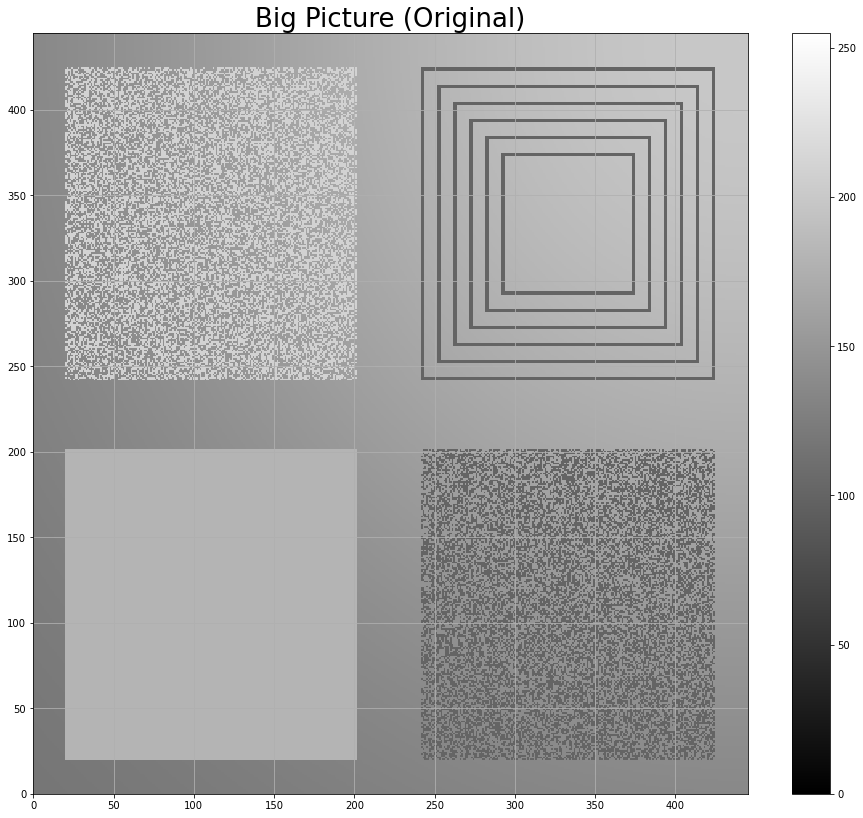

In [20]:
sb1,sb2 = 445,445
big_pic = np.ones((sb1,sb2))*110
big_pic1 = np.zeros((sb1,sb2))
for i in range(0,sb1):
    for j in range(0,sb2):
        someWeirdThing(big_pic1,i,j,440,80000,90)
big_pic = big_pic + big_pic1

#botton left
castRect(big_pic,20,202,20,202,180)
#top right
castRectHole(big_pic,242,425,242,425,100)
castRectHole(big_pic,252,415,252,415,100)
castRectHole(big_pic,262,405,262,405,100)
castRectHole(big_pic,272,395,272,395,100)
castRectHole(big_pic,282,385,282,385,100)
castRectHole(big_pic,292,375,292,375,100)

#top left
randRect(big_pic,20,202,242,425,210)
#botton righ
randRect(big_pic,242,425,20,202,100)


np.savetxt("big_pic.txt", big_pic,fmt="%d",header="445 445".format(sb1,sb2),delimiter=" ",comments="")

big_pic1 = np.genfromtxt("big_pic.txt",dtype=int, skip_header=True,)

example_pic = big_pic1
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Big Picture (Original)", fontsize=26)

fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/big_pic.jpeg", format="jpeg", dpi=200)
plt.show()

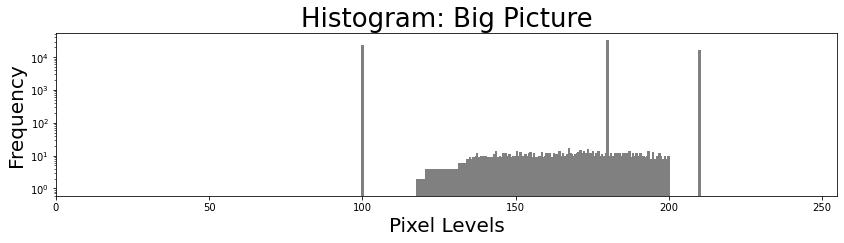

In [21]:
values,counts = np.unique(big_pic,return_counts=True)

plt.figure(figsize=(14,3))
plt.title("Histogram: Big Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

plt.yscale('log')

fig.tight_layout()
plt.savefig("pics_preview/big_pic_hist.jpeg", format="jpeg", dpi=200, bbox_inches="tight")
plt.show()

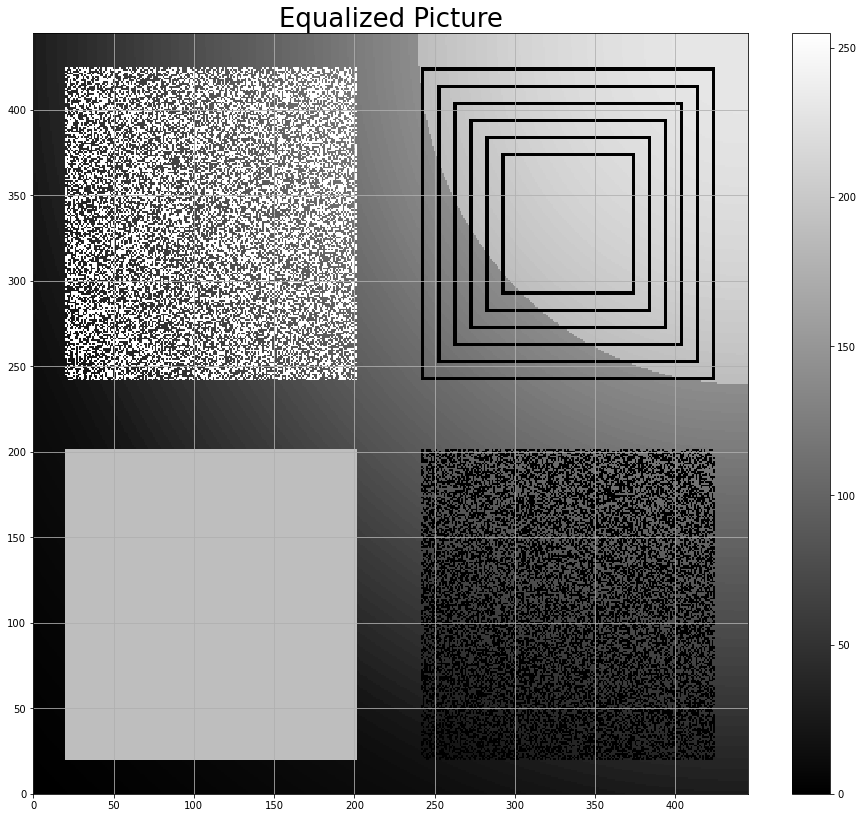

In [22]:
ebig_pic1 = np.genfromtxt("../basic/output/big_pic.txt",dtype=int, skip_header=True,)

example_pic = ebig_pic1
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Equalized Picture", fontsize=26)

fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/eq_big_pic.jpeg", format="jpeg", dpi=200)
plt.show()

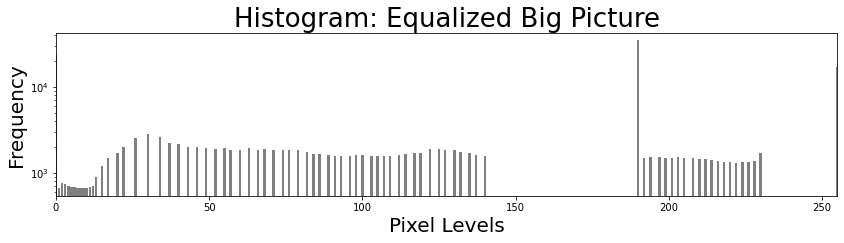

In [23]:
values,counts = np.unique(ebig_pic1,return_counts=True)
plt.figure(figsize=(14,3))
plt.title("Histogram: Equalized Big Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

plt.yscale('log')

fig.tight_layout()
plt.savefig("pics_preview/eq_big_pic_hist.jpeg", format="jpeg", dpi=200, bbox_inches="tight")
plt.show()

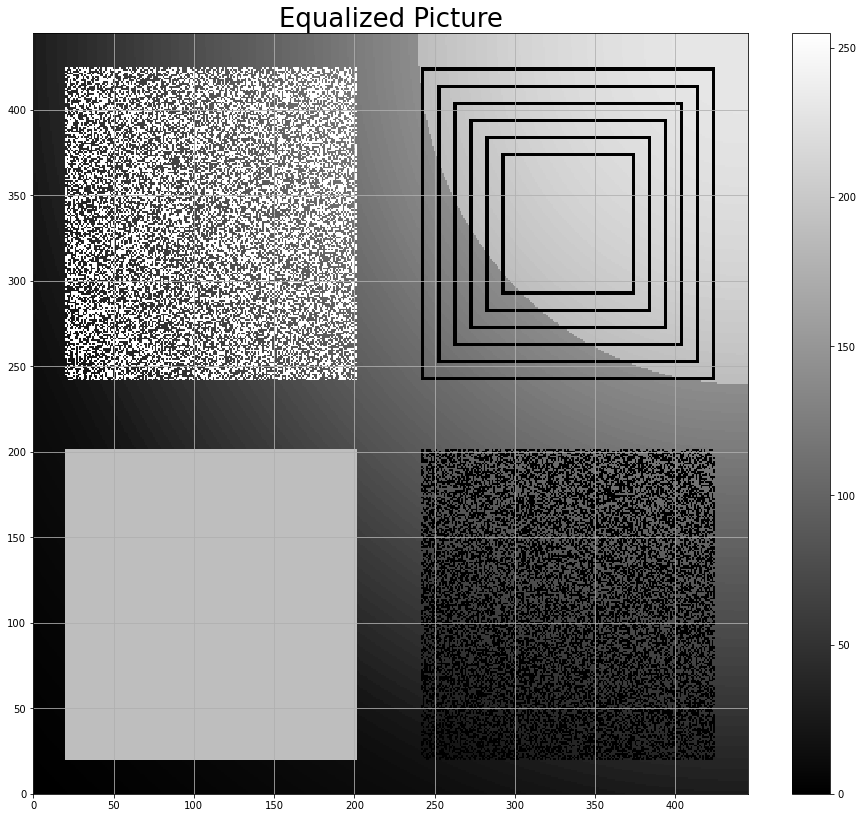

In [10]:
ebig_pic1 = np.genfromtxt("../cpu-parallel/output/big_pic.txt",dtype=int, skip_header=True,)

example_pic = ebig_pic1
fig, ax = plt.subplots(1,1,figsize=(16,14))
psm = ax.pcolormesh(example_pic.T, cmap=GRAY, rasterized=True, vmin=0, vmax=255)
ax.set_title("Equalized Picture", fontsize=26)

fig.colorbar(psm, ax=ax)
plt.grid()
plt.savefig("pics_preview/eq_big_pic.jpeg", format="jpeg", dpi=200)
plt.show()

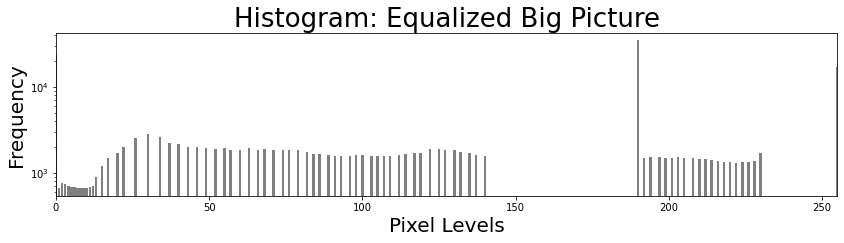

In [11]:
values,counts = np.unique(ebig_pic1,return_counts=True)
plt.figure(figsize=(14,3))
plt.title("Histogram: Equalized Big Picture", fontsize=26)
plt.bar(values,counts, color="gray")

plt.xlim(0,255)
plt.xlabel("Pixel Levels", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

plt.yscale('log')

fig.tight_layout()
plt.savefig("pics_preview/big_pic_hist.jpeg", format="jpeg", dpi=200, bbox_inches="tight")
plt.show()